In [42]:
from keras.preprocessing import image
import librosa.display, os


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

In [6]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

    

Load image từ folder MidRipe dán nhãn 0

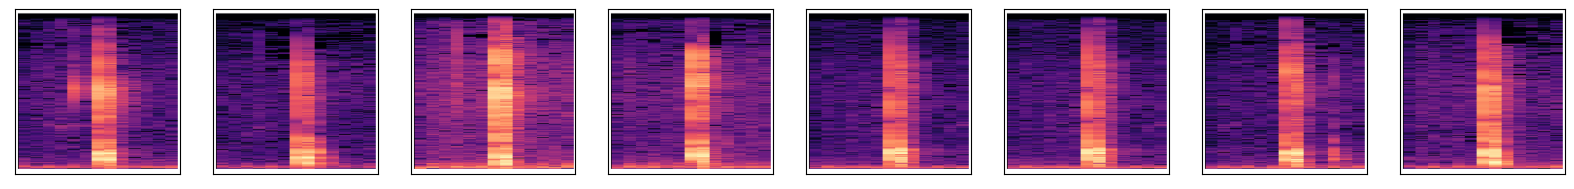

In [8]:
images, labels = load_images_from_path('Spectrograms/MidRipe', 0)
show_images(images)
    
x += images
y += labels

Dán nhãn ảnh từ folder Ripe là 1


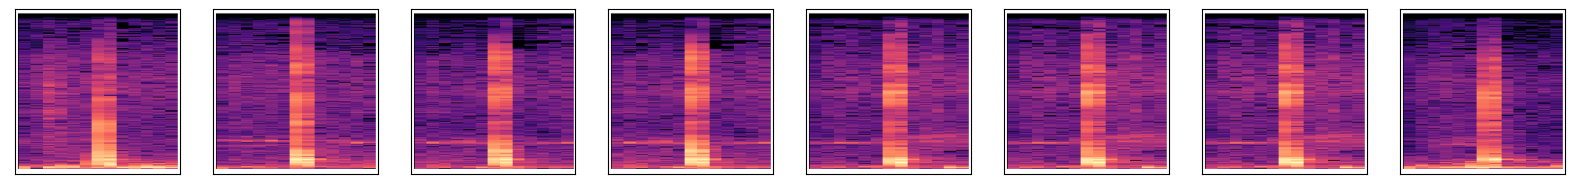

In [9]:
images, labels = load_images_from_path('Spectrograms/Ripe', 1)
show_images(images)
    
x += images
y += labels

Load ảnh từ folder Unripe dán nhãn 2

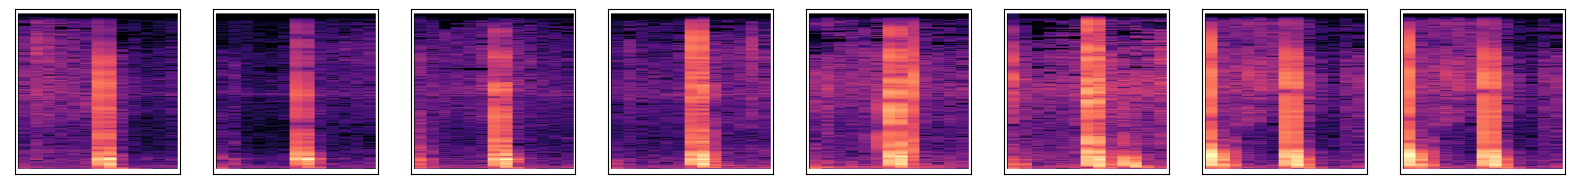

In [10]:
images, labels = load_images_from_path('Spectrograms/Unripe', 2)
show_images(images)
    
x += images
y += labels

Chia file test và file train 

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build and train a CNN
Sử dụng keras build một model CNN đơn giản


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Changed to 3 units
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,211,523 (73.29 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

Train the CNN and save the `history` object returned by `fit` in a local variable.

In [13]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 519ms/step - accuracy: 0.4429 - loss: 1.3251 - val_accuracy: 0.4198 - val_loss: 1.0761
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 505ms/step - accuracy: 0.4303 - loss: 1.0606 - val_accuracy: 0.3588 - val_loss: 1.0332
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 516ms/step - accuracy: 0.4652 - loss: 1.0114 - val_accuracy: 0.5573 - val_loss: 0.8361
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 504ms/step - accuracy: 0.6630 - loss: 0.8218 - val_accuracy: 0.6489 - val_loss: 0.8123
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 500ms/step - accuracy: 0.6745 - loss: 0.7342 - val_accuracy: 0.7557 - val_loss: 0.7237
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 490ms/step - accuracy: 0.7409 - loss: 0.5945 - val_accuracy: 0.8015 - val_loss: 0.5046
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 494ms/step - accuracy: 0.7582 - loss: 0.5350 - val_accuracy: 0.7863 - val_loss: 0.4732
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 505ms/step - accuracy: 0.8212 - loss: 0.4658 - val_accu

In [31]:
model

<Sequential name=sequential_1, built=True>

Plot the training and validation accuracy.

[]

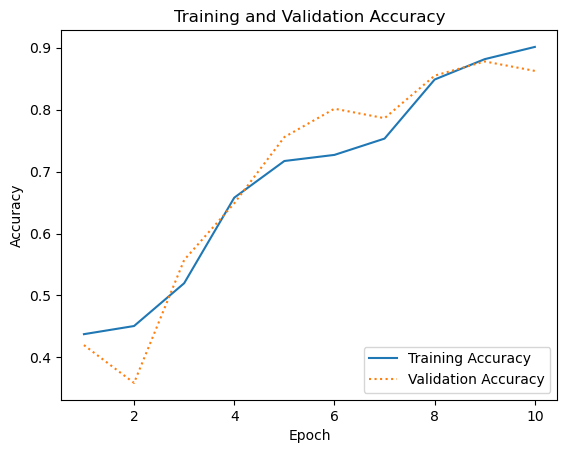

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

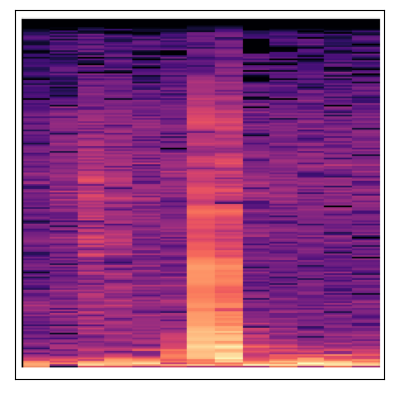

In [27]:
# create_spectrogram('Desktop/Durian/Test/31.m4a', 'Spectrograms/sample1.png')

x = image.load_img('21_1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

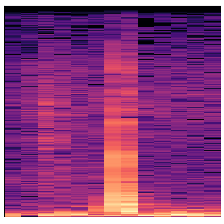

In [28]:
x

Lưu model với tên my_model.h5

In [32]:
model.save('my_model.h5')

Load model

In [34]:
from keras.models import load_model

model = load_model('my_model.h5')


Run model

In [41]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Optionally, preprocess input if needed (depends on your specific model's requirements)
# For example, if using VGG16 or similar model, you might use preprocess_input from keras.applications
# from keras.applications.vgg16 import preprocess_input
# img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = predictions.argmax(axis=-1)

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: [1]


The accuracy is decent given that the network was trained with just 280 images, but it might be possible to achieve higher accuracy by employing transfer learning.

## Use transfer learning to improve accuracy

[Transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a) is a powerful technique that allows sophisticated CNNs trained by Google, Microsoft, and others on GPUs to be repurposed and used to solve domain-specific problems. Many pretrained CNNs are available in the public domain, and several are included with Keras. Let's use [`MobileNetV2`](https://keras.io/api/applications/mobilenet/), a pretrained CNN from Google that is optimized for mobile devices, to extract features from spectrogram images.

> `MobileNetV2` requires less processing power and has a smaller memory footprint than CNNs such as `ResNet50V2`. That's why it is ideal for mobile devices. You can learn more about it in the [Google AI blog](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html).

Start by calling Keras's [MobileNetV2](https://keras.io/api/applications/mobilenet/) function to instantiate `MobileNetV2` without the classification layers. Use the [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input) function for `MobileNet` networks to preprocess the training and testing images. Then run both datasets through `MobileNetV2` to extract features.

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Specify the audio file to process
audio_file = 'Midripe/segment_example.wav'  # Replace with your actual file path
output_folder = 'MidRipe_Spectrograms'

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

try:
    # Load the .wav file
    y, sr = librosa.load(audio_file)

    # Compute the STFT
    stft_values = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_magnitude = np.abs(stft_values)

    # Convert magnitude to decibel scale
    log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_stft, sr=sr, cmap='magma')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save the plot
    output_file = os.path.join(output_folder, 'spectrogram_example.png')  # Adjust file name as needed
    plt.savefig(output_file)
    plt.close()  # Close the plot to free up memory
    print(f"Spectrogram saved: {output_file}")

except FileNotFoundError:
    print(f"File {audio_file} not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

In [24]:
from tensorflow.keras.applications.mobilenet import preprocess_input


Define a neural network to classify features extracted by `MobileNetV2`.

In [16]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the network with features extracted by `MobileNetV2`.

In [17]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 [==============================] - 4s 131ms/step - loss: 31.6268 - accuracy: 0.5466 - val_loss: 3.7857 - val_accuracy: 0.8583
Epoch 2/10
28/28 [==============================] - 4s 125ms/step - loss: 1.6843 - accuracy: 0.9399 - val_loss: 2.0175 - val_accuracy: 0.9250
Epoch 3/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3810 - accuracy: 0.9782 - val_loss: 8.0027 - val_accuracy: 0.8417
Epoch 4/10
28/28 [==============================] - 4s 126ms/step - loss: 1.9832 - accuracy: 0.9639 - val_loss: 7.5654 - val_accuracy: 0.8333
Epoch 5/10
28/28 [==============================] - 3s 125ms/step - loss: 1.9648 - accuracy: 0.9188 - val_loss: 1.5344 - val_accuracy: 0.9500
Epoch 6/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3354 - accuracy: 0.9938 - val_loss: 2.0490 - val_accuracy: 0.9250
Epoch 7/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3852 - accuracy: 0.9846 - val_loss: 1.5639 - val_accuracy: 0.9583
Epoch

Plot the training and validation accuracy.

[]

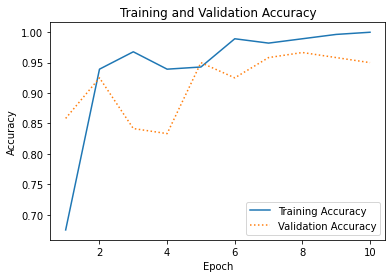

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Run the test images through the network and use a confusion matrix to assess the results.

Text(89.18, 0.5, 'Actual label')

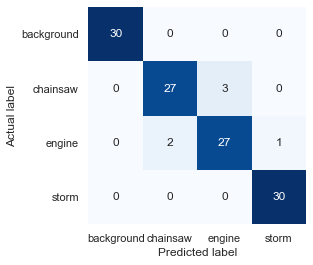

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

The network is pretty adept at identifying clips that don't contain the sounds of chainsaw or engines. It sometimes confuses chainsaw sounds and engine sounds, but that's OK, because the presence of either might indicate illicit activity in a rain forest.

## Test with unrelated WAV files

The "Sounds" directory has a subdirectory named "samples" containing WAV files that the CNN was neither trained nor tested with. The WAV files bear no relation to the samples used for training and testing; they were extracted from a YouTube video documenting Brazil's efforts to curb illegal logging. Let's use the model trained in the previous exercise to analyze these files for sounds of logging activity. Start by creating a spectrogram from the first sample WAV file, which contains audio of loggers cutting down trees in the Amazon.

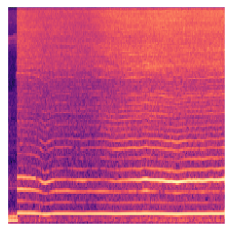

In [20]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the spectrogram image, pass it to `MobileNetV2` for feature extraction, and classify the features.

In [21]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

background: 0.0
chainsaw: 1.0
engine: 5.189781730147105e-35
storm: 0.0


Create a spectrogram from a WAV file that includes the sounds of a logging truck rumbling through the rain forest.

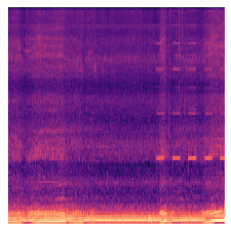

In [22]:
create_spectrogram('Sounds/samples/sample2.wav', 'Spectrograms/sample2.png')

x = image.load_img('Spectrograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the spectrogram image, pass it to `MobileNetV2` for feature extraction, and classify the features.

In [23]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

background: 0.0
chainsaw: 1.2086960212255175e-20
engine: 1.0
storm: 0.0


If the network got either of the samples wrong, try training it again with the output from `MobileNetV2`. Remember that a neural network will train differently every time, in part because Keras initializes the weights and biases with small random values. In the real world, data scientists often train a neural network 20 or more times and average the results to quantify its accuracy.